<a href="https://colab.research.google.com/github/KuanChihLee/Deep-Learning_in_TensorFlow/blob/master/ST_DL_Assign_1_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import sklearn.model_selection as sk

In [0]:
cifar10 = tf.keras.datasets.cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 34s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
train = x_train.sample(frac=0.3333, random_state=20)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

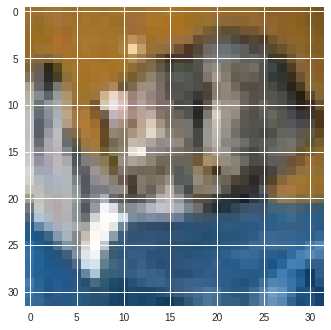

In [0]:
plt.imshow(x_test[0])

In [0]:
print(y_test[0])

[3]


In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
50000/50000 [==============================] - 39s 789us/sample - loss: 1.9589 - acc: 0.2942
Epoch 2/5
50000/50000 [==============================] - 39s 777us/sample - loss: 1.8368 - acc: 0.3327
Epoch 3/5
50000/50000 [==============================] - 39s 783us/sample - loss: 1.7961 - acc: 0.3503
Epoch 4/5
50000/50000 [==============================] - 39s 776us/sample - loss: 1.7677 - acc: 0.3601
Epoch 5/5
10000/10000 [==============================] - 1s 148us/sample - loss: 1.6601 - acc: 0.4124


[1.6601224376678467, 0.4124]

In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

with tf.device('/gpu:0'):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
  
  model.add(tf.keras.layers.Dense(256, bias_initializer="random_normal"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu')) 
  tf.keras.layers.Dropout(0.4)
  model.add(tf.keras.layers.Dense(256, bias_initializer="random_normal"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu')) 
  tf.keras.layers.Dropout(0.4)
  
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split = 0.2)
  model.evaluate(x_test, y_test)

Found GPU at: /device:GPU:0
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 29s 737us/sample - loss: 1.7455 - acc: 0.3775 - val_loss: 1.6726 - val_acc: 0.4064
Epoch 2/20
40000/40000 [==============================] - 29s 720us/sample - loss: 1.5551 - acc: 0.4457 - val_loss: 1.6763 - val_acc: 0.4164
Epoch 3/20
40000/40000 [==============================] - 28s 707us/sample - loss: 1.4704 - acc: 0.4751 - val_loss: 1.5199 - val_acc: 0.4638
Epoch 4/20
40000/40000 [==============================] - 27s 676us/sample - loss: 1.3999 - acc: 0.5038 - val_loss: 1.5025 - val_acc: 0.4714
Epoch 5/20
40000/40000 [==============================] - 29s 713us/sample - loss: 1.3489 - acc: 0.5204 - val_loss: 1.4866 - val_acc: 0.4821
Epoch 6/20
40000/40000 [==============================] - 29s 713us/sample - loss: 1.2905 - acc: 0.5426 - val_loss: 1.4424 - val_acc: 0.4899
Epoch 7/20
40000/40000 [==============================] - 29s 733us/sample -

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save('model')    
model_file = drive.CreateFile({'title' : 'model'})
model_file.SetContentFile('model')
model_file.Upload()

# download to google drive
downloaded = drive.CreateFile({'id':model_file.get('id')}) 
downloaded.GetContentFile('TestFile')  

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving model to model
User uploaded file "model" with length 10319856 bytes


In [0]:
!ls

adc.json  model  sample_data


In [0]:
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_restore_models.ipynb#scrollTo=mRyd5qQQIXZm
# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
new_model = tf.keras.models.load_model('model')
new_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_95 (Dense)             (None, 256)               786688    
_________________________________________________________________
batch_normalization_v1_68 (B (None, 256)               1024      
_________________________________________________________________
activation_42 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_v1_69 (B (None, 256)               1024      
______________________

In [0]:
import numpy as np
new_model.predict(np.reshape(x_test[1], (1,32,32,3)))

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)